# EXPERIMENT 4 - Data Wrangling and Visualization

#### SAEZ, Eljenzal Hoper U.

#### 2ECE - C

In [33]:
import pandas as pd #import pandas library

In [42]:
import matplotlib.pyplot as plt

In [44]:
boards = pd.read_csv('board2.csv') # convert the xlsx filetype to csv
boards

,Name,Gender,Track,Hometown,Math,Electronics,GEAS,Communication
0,S1,Male,Instrumentation,Luzon,58,89,75,78
1,S2,Female,Communication,Mindanao,52,75,90,52
2,S3,Female,Instrumentation,Mindanao,83,74,77,57
3,S4,Male,Instrumentation,Visayas,65,58,91,68
4,S5,Male,Communication,Luzon,59,86,43,88
5,S6,Female,Microelectronics,Visayas,88,45,86,83
6,S7,Female,Instrumentation,Luzon,66,60,60,48
7,S8,Male,Instrumentation,Luzon,49,81,64,53
8,S9,Male,Instrumentation,Luzon,50,36,63,42
9,S10,Male,Microelectronics,Mindanao,80,84,61,44


## ECE BOARD EXAM PROBLEM

##### Using data wrangling and data visualization technique with storytelling, analyze the data and present different (i) data frames; and (ii) visuals using the dataset given.

### 1. Create the following data frames based on the format provided:

#### a. Filename: Instru = [“Name”, “GEAS”, “Electronics >70”]; where track is constant as Instrumentation and hometown Luzon

In [72]:
# DataFrame Representation

instru = pd.DataFrame(boards, columns=['Name','GEAS','Electronics','Track','Hometown']) # set the data frame in order for it to only show Name, Geas, Electronics
# Track and Hometown will be filtered out later since they're constant

x = instru.loc[(instru['Electronics'] > 70) & (instru['Hometown']=='Luzon') & (instru['Track']=='Instrumentation'), ['Name','GEAS','Electronics']] # use .loc to find the Electronics column to be > 70, 
# find Hometown which is equal to Luzon, and Track which is equal to Instrumentation
# only show Name, GEAS, and Electronics in DataFrame set.

x

,Name,GEAS,Electronics
0,S1,75,89
7,S8,64,81
29,S30,57,81


Text(0, 0.5, 'GEAS and Electronics Grades')

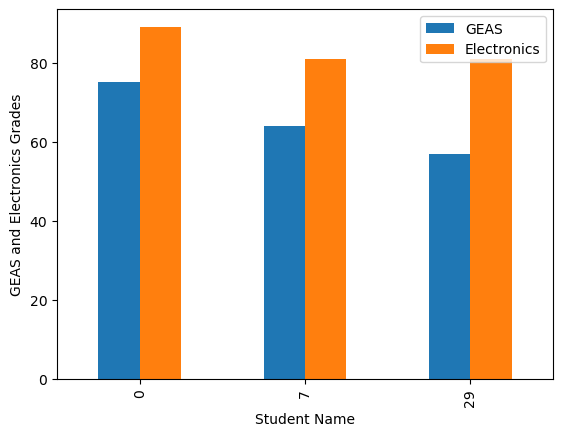

In [74]:
# Graphical Representation

x.plot.bar()
plt.xlabel('Student Name') # set x label a Student Name
plt.ylabel('GEAS and Electronics Grades') # set y label as GEAS and Electronics Grades

#### b. Filename: Mindy = [ “Name”, “Track”, “Electronics”, “Average >=55”]; where hometown is constant as Mindanao and gender Female

In [77]:
# DataFrame representation

Mindy = pd.DataFrame(boards, columns=['Name','Gender','Track','Math','Electronics','GEAS','Communication','Hometown']) # set the data frame in order for it to only show Name, Track, Electronics
# Hometown and Gender  will be filtered out later since they're constant

Mindy['Average'] = Mindy[['Math', 'Electronics', 'GEAS', 'Communication']].mean(axis=1) # make a new column with the mean of Math, Electronics, GEAS, and Communication in each row.

Mindydata = Mindy.loc[(Mindy['Average'] >= 55) & 
        (Mindy['Hometown']=='Mindanao') & 
        (Mindy['Gender']=='Female'), 
        ['Name','Track','Electronics','Average']] # use .loc so that it will only show the specific parameters needed.

Mindydata

,Name,Track,Electronics,Average
1,S2,Communication,75,67.25
2,S3,Instrumentation,74,72.75
14,S15,Microelectronics,41,59.00
16,S17,Microelectronics,79,70.50
19,S20,Communication,60,66.50


Text(0.5, 1.0, 'Electronics and Average Grade')

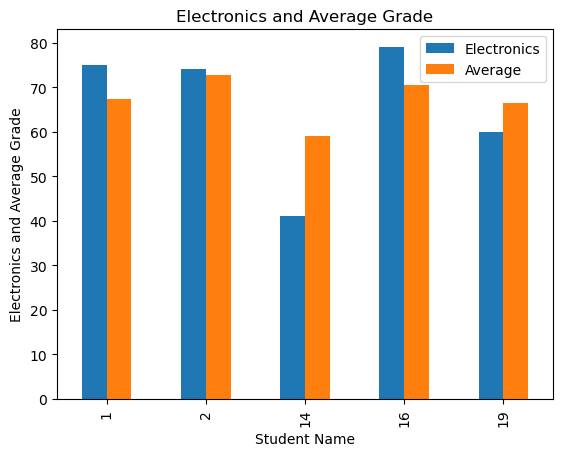

In [79]:
# Graphical representation

Mindydata.plot.bar()
plt.xlabel('Student Name') # set x label as Student Name
plt.ylabel('Electronics and Average Grade') # set y label as Electronics and Average Grad
plt.title('Electronics and Average Grade') # set title as tracks and average grade

### 2. Create a visualization that shows how the different features contributes to average grade.

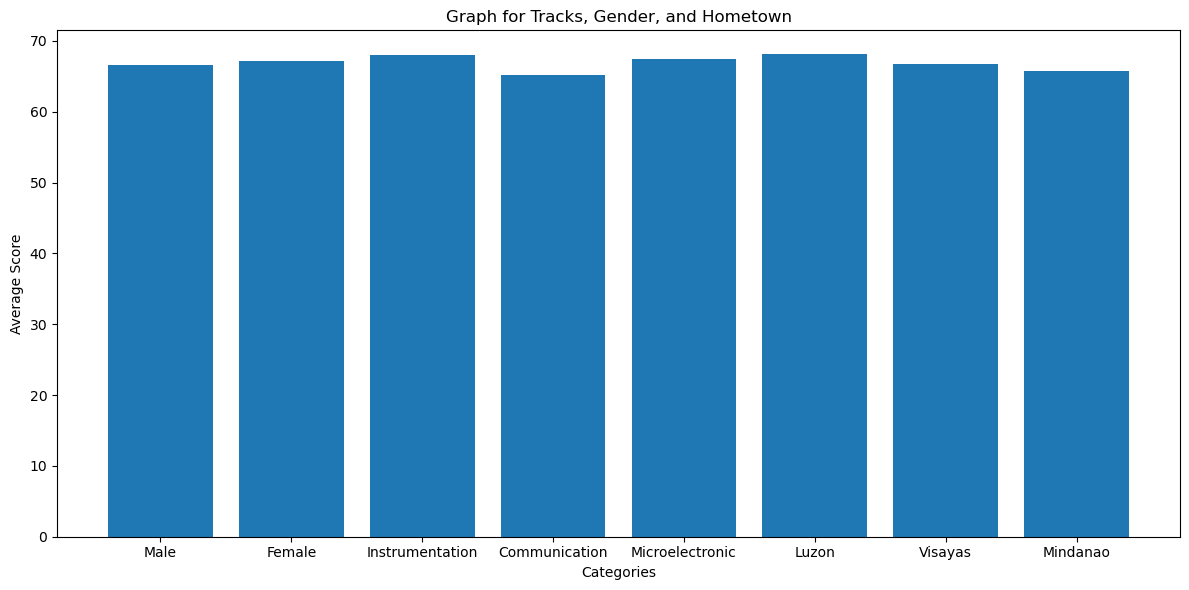

In [82]:
# Group the dataframe Mindy by the Gender, Track, and Hometown column and calculates the mean of Average column for each category
gender = Mindy.groupby('Gender')['Average'].mean()
track = Mindy.groupby('Track')['Average'].mean()
hometown = Mindy.groupby('Hometown')['Average'].mean()

plt.figure(figsize=(12, 6)) # resize the bar graph to make it readable

bars = plt.bar(['Male', 'Female', 'Instrumentation', 'Communication', 'Microelectronic', 'Luzon', 'Visayas', 'Mindanao'], list(gender.values)+list(track.values)+list(hometown.values))
#  makes a bar graph, the x labels the combination of categories, and y labels the the average scores.

plt.xlabel('Categories') # add x label as categories
plt.ylabel('Average Score') # add y label as average score
plt.title('Graph for Tracks, Gender, and Hometown') # add title as graph for tracks, gender, and hometown

# show the plot
plt.tight_layout()
plt.show()

### Does chosen track in college, gender, or hometown contributes to a higher average score?

Based on the bar graph, there doesn't appear to be any correlation between the various features and the overall average scores for each category.